In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
# droping label column; getting independent deature
X= df.drop('label', axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [4]:
# dependent feature
y= df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [5]:
# shape before dropping
print(df.shape)
print(X.shape)
print(y.shape)

(20800, 5)
(20800, 4)
(20800,)


In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [7]:
# droping na values
df=df.dropna()

In [8]:
# shape after droppign
print(df.shape)

(18285, 5)


In [9]:
# copying dataset
messages= df.copy()

In [10]:
# resetting index
messages.reset_index(inplace=True)

In [11]:
messages.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### text preprocessing --> removing special char, set all lower char, split and remove stopwords 

In [12]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [13]:
corpus=[]
ps= PorterStemmer()

for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [15]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know anthoni weiner sext teenag appar littl thing fact matter ch

In [16]:
# applying CountVector ie Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
# choose top 5000 top frequent feature; ngram_range take range of 1 word, 2 word, 3 word
cv= CountVectorizer(max_features=5000, ngram_range=(1,3))
X= cv.fit_transform(corpus).toarray()

In [17]:
y= messages['label']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=0)

In [19]:
cv.get_feature_names()[:20]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access']

In [20]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [21]:
count_df= pd.DataFrame(X_train, columns=cv.get_feature_names())

In [22]:
count_df.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know anthoni weiner sext teenag appar littl thing fact matter ch

In [25]:
import matplotlib.pyplot as plt

In [26]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap= plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Multinomial NB

In [27]:
from sklearn.naive_bayes import MultinomialNB
classifier= MultinomialNB()

In [28]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.898
Confusion matrix, without normalization


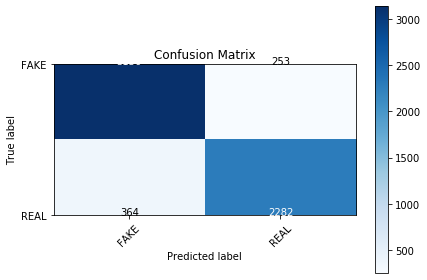

In [29]:
classifier.fit(X_train, y_train)
pred= classifier.predict(X_test)
score= metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm= metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [30]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8977630488815245

### Passive Aggressive Classifier Algorithm

In [31]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf= PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.898
Confusion matrix, without normalization


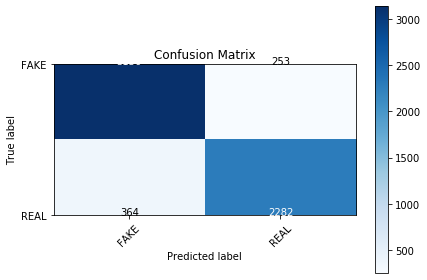

In [32]:
 # confusion matrix
classifier.fit(X_train, y_train)
pred= classifier.predict(X_test)
score= metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm= metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Multinomial Classifier with Hyperparameter

In [33]:
classifier= MultinomialNB(alpha=0.1)

In [34]:
previous_score=0
# starting from 0 and jumping 0.1 step 
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\Abdullah\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8990886495443248
Alpha: 0.1, Score : 0.8984258492129246
Alpha: 0.2, Score : 0.8980944490472246
Alpha: 0.30000000000000004, Score : 0.8980944490472246
Alpha: 0.4, Score : 0.8982601491300746
Alpha: 0.5, Score : 0.8982601491300746
Alpha: 0.6000000000000001, Score : 0.8980944490472246
Alpha: 0.7000000000000001, Score : 0.8980944490472246
Alpha: 0.8, Score : 0.8979287489643745
Alpha: 0.9, Score : 0.8977630488815245


In [35]:
## Get Features names
feature_names = cv.get_feature_names()

In [36]:
classifier.coef_[0]

C:\Users\Abdullah\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([-10.64736682,  -9.14151929,  -9.27080072, ...,  -9.00037421,
        -8.2432783 ,  -9.36731922])

In [37]:
# Most real
# show smallest negative value
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-5.07303253773893, 'trump'),
 (-5.105085437987942, 'clinton'),
 (-5.251784261236111, 'peopl'),
 (-5.262171914498623, 'one'),
 (-5.320431007386073, 'state'),
 (-5.396167328676395, 'us'),
 (-5.4061261362665025, 'would'),
 (-5.518843883055082, 'like'),
 (-5.529973356366376, 'hillari'),
 (-5.554147807629837, 'time'),
 (-5.632957338144276, 'elect'),
 (-5.643298220146336, 'year'),
 (-5.697315338301843, 'said'),
 (-5.707695100317027, 'american'),
 (-5.770432150798351, 'new'),
 (-5.812260715607884, 'use'),
 (-5.818433686788502, 'also'),
 (-5.822448363981332, 'presid'),
 (-5.845944468368517, 'world'),
 (-5.8506354365533255, 'go')]

In [38]:
# Most fake
# biggest negative value
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-14.534641657940355, 'brief post'),
 (-14.534641657940355, 'follow pam'),
 (-14.534641657940355, 'follow pam key'),
 (-14.534641657940355, 'gold medal'),
 (-14.534641657940355, 'gorsuch'),
 (-14.534641657940355, 'judg gorsuch'),
 (-14.534641657940355, 'key twitter'),
 (-14.534641657940355, 'key twitter pamkeynen'),
 (-14.534641657940355, 'morn brief'),
 (-14.534641657940355, 'mr ail'),
 (-14.534641657940355, 'mr bannon'),
 (-14.534641657940355, 'mr castro'),
 (-14.534641657940355, 'mr christi'),
 (-14.534641657940355, 'mr cruz'),
 (-14.534641657940355, 'mr de'),
 (-14.534641657940355, 'mr flynn'),
 (-14.534641657940355, 'mr kushner'),
 (-14.534641657940355, 'mr roof'),
 (-14.534641657940355, 'mr sander'),
 (-14.534641657940355, 'mr scott')]

### HashingVectorizer

In [49]:
from sklearn.feature_extraction.text import HashingVectorizer
hs_vectorizer= HashingVectorizer(n_features=5000, decode_error = 'ignore')
X=hs_vectorizer.fit_transform(corpus).toarray()

In [50]:
X.shape

(18285, 5000)

In [51]:
X

array([[ 0.        , -0.161281  ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.03840477,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.02347263,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.06984303,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [53]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

ValueError: Negative values in data passed to MultinomialNB (input X)